<a href="https://colab.research.google.com/github/anastasiaziaziulia/Portfolio-Projects/blob/main/Project_Customer_Spending_Analysis_and_Monthly_Spending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prompt 1: Customer Spending Analysis and Sales Regression

**Task**: Analyze the relationship between customer demographics and their spending patterns to help a retail store optimize its sales strategies.

### Data Extraction
- Extract customer transaction data from a **JSON** file using **pandas**.

### Pre-Processing
- **Clean the Data**: Handle missing values, create new features such as average monthly spend, and convert categorical variables (e.g., gender, region) into numerical format.

### Data Summary
- Use **pandas** to generate summary statistics for key metrics (e.g., mean, median of monthly spend).
- **Visualization**: Visualize the distribution of spending relative to the feature variables with **matplotlib**.

### Statistical Modeling
- Use **statsmodels** to build a **multiple linear regression model** to predict customer spending based on demographics (e.g., age, income, region).
- **Interpretation**: Analyze model coefficients to identify key drivers of spending.

---

### The data has the following structure.

```
[
    {
        "customer_id": "CUST_1",
        "age": 56,
        "gender": "M",
        "region": "South",
        "income": "$68,900.00",
        "monthly_spend": "$154.82"
    },
    {
        "customer_id": "CUST_2",
        "age": 69,
        "gender": "M",
        "region": "West",
        "income": "$78,300.00",
        "monthly_spend": "$160.97"
    },
    {
        "customer_id": "CUST_3",
        "age": 46,
        "gender": "M",
        "region": "West",
        "income": "$40,000.00",
        "monthly_spend": "$141.76"
    },
    ...
]

```

Run the code block below to store the data as `customers_json`.

In [ ]:
# @title
customers_json="""
[
  {
    "customer_id": "CUST_1",
    "age": 56,
    "gender": "M",
    "region": "South",
    "income": "$68,900.00",
    "monthly_spend": "$154.82"
  },
  {
    "customer_id": "CUST_2",
    "age": 69,
    "gender": "M",
    "region": "West",
    "income": "$78,300.00",
    "monthly_spend": "$160.97"
  },
  {
    "customer_id": "CUST_3",
    "age": 46,
    "gender": "M",
    "region": "West",
    "income": "$40,000.00",
    "monthly_spend": "$141.76"
  },
  {
    "customer_id": "CUST_4",
    "age": 32,
    "gender": "M",
    "region": "North",
    "income": "$30,200.00",
    "monthly_spend": "$102.35"
  },
  {
    "customer_id": "CUST_5",
    "age": 60,
    "gender": "M",
    "region": "South",
    "income": "$73,900.00",
    "monthly_spend": "$207.71"
  },
  {
    "customer_id": "CUST_6",
    "age": 25,
    "gender": "F",
    "region": "West",
    "income": "$36,100.00",
    "monthly_spend": "$95.25"
  },
  {
    "customer_id": "CUST_7",
    "age": 38,
    "gender": "M",
    "region": "North",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_8",
    "age": 56,
    "gender": "F",
    "region": "South",
    "income": "$58,300.00",
    "monthly_spend": "$180.21"
  },
  {
    "customer_id": "CUST_9",
    "age": 36,
    "gender": "F",
    "region": "East",
    "income": "$39,600.00",
    "monthly_spend": "$120.70"
  },
  {
    "customer_id": "CUST_10",
    "age": 40,
    "gender": "F",
    "region": "North",
    "income": "$51,200.00",
    "monthly_spend": "$149.48"
  },
  {
    "customer_id": "CUST_11",
    "age": 28,
    "gender": "M",
    "region": "West",
    "income": "$45,500.00",
    "monthly_spend": "$163.53"
  },
  {
    "customer_id": "CUST_12",
    "age": 28,
    "gender": "M",
    "region": "East",
    "income": "$33,700.00",
    "monthly_spend": "$107.85"
  },
  {
    "customer_id": "CUST_13",
    "age": 41,
    "gender": "M",
    "region": "East",
    "income": "$57,700.00",
    "monthly_spend": "$153.59"
  },
  {
    "customer_id": "CUST_14",
    "age": 53,
    "gender": "M",
    "region": "East",
    "income": "$66,700.00",
    "monthly_spend": "$158.25"
  },
  {
    "customer_id": "CUST_15",
    "age": 57,
    "gender": "F",
    "region": "North",
    "income": "$64,100.00",
    "monthly_spend": "$214.89"
  },
  {
    "customer_id": "CUST_16",
    "age": 41,
    "gender": "M",
    "region": "West",
    "income": "$31,600.00",
    "monthly_spend": "$114.65"
  },
  {
    "customer_id": "CUST_17",
    "age": 20,
    "gender": "M",
    "region": "East",
    "income": "$14,700.00",
    "monthly_spend": "$88.62"
  },
  {
    "customer_id": "CUST_18",
    "age": 39,
    "gender": "M",
    "region": "South",
    "income": "$51,400.00",
    "monthly_spend": "$146.56"
  },
  {
    "customer_id": "CUST_19",
    "age": 19,
    "gender": "M",
    "region": "East",
    "income": "$6,900.00",
    "monthly_spend": "$123.91"
  },
  {
    "customer_id": "CUST_20",
    "age": 41,
    "gender": "M",
    "region": "East",
    "income": "$47,200.00",
    "monthly_spend": "$88.24"
  },
  {
    "customer_id": "CUST_21",
    "age": 61,
    "gender": "F",
    "region": "North",
    "income": "$76,000.00",
    "monthly_spend": "$285.70"
  },
  {
    "customer_id": "CUST_22",
    "age": 47,
    "gender": "M",
    "region": "North",
    "income": "$53,500.00",
    "monthly_spend": "$160.45"
  },
  {
    "customer_id": "CUST_23",
    "age": 55,
    "gender": "F",
    "region": "West",
    "income": "$54,000.00",
    "monthly_spend": "$195.40"
  },
  {
    "customer_id": "CUST_24",
    "age": 19,
    "gender": "M",
    "region": "South",
    "income": "$15,500.00",
    "monthly_spend": "$72.56"
  },
  {
    "customer_id": "CUST_25",
    "age": 38,
    "gender": "F",
    "region": "North",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_26",
    "age": 50,
    "gender": "M",
    "region": "East",
    "income": "$59,700.00",
    "monthly_spend": "$160.57"
  },
  {
    "customer_id": "CUST_27",
    "age": 29,
    "gender": "M",
    "region": "West",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_28",
    "age": 39,
    "gender": "F",
    "region": "East",
    "income": "$54,700.00",
    "monthly_spend": "$188.40"
  },
  {
    "customer_id": "CUST_29",
    "age": 61,
    "gender": "F",
    "region": "East",
    "income": "$74,500.00",
    "monthly_spend": "$269.57"
  },
  {
    "customer_id": "CUST_30",
    "age": 42,
    "gender": "F",
    "region": "North",
    "income": "$64,900.00",
    "monthly_spend": "$216.97"
  },
  {
    "customer_id": "CUST_31",
    "age": 66,
    "gender": "M",
    "region": "West",
    "income": "$76,700.00",
    "monthly_spend": "$171.68"
  },
  {
    "customer_id": "CUST_32",
    "age": 44,
    "gender": "F",
    "region": "South",
    "income": "$47,400.00",
    "monthly_spend": "$137.99"
  },
  {
    "customer_id": "CUST_33",
    "age": 59,
    "gender": "M",
    "region": "South",
    "income": "$62,600.00",
    "monthly_spend": "$161.65"
  },
  {
    "customer_id": "CUST_34",
    "age": 45,
    "gender": "M",
    "region": "North",
    "income": "$30,700.00",
    "monthly_spend": "$214.20"
  },
  {
    "customer_id": "CUST_35",
    "age": 33,
    "gender": "F",
    "region": "North",
    "income": "$39,500.00",
    "monthly_spend": "$104.81"
  },
  {
    "customer_id": "CUST_36",
    "age": 32,
    "gender": "F",
    "region": "West",
    "income": "$36,800.00",
    "monthly_spend": "$123.93"
  },
  {
    "customer_id": "CUST_37",
    "age": 64,
    "gender": "M",
    "region": "South",
    "income": "$55,700.00",
    "monthly_spend": "$183.65"
  },
  {
    "customer_id": "CUST_38",
    "age": 68,
    "gender": "M",
    "region": "South",
    "income": "$72,700.00",
    "monthly_spend": "$185.24"
  },
  {
    "customer_id": "CUST_39",
    "age": 61,
    "gender": "F",
    "region": "South",
    "income": "$79,400.00",
    "monthly_spend": "$229.05"
  },
  {
    "customer_id": "CUST_40",
    "age": 69,
    "gender": "F",
    "region": "East",
    "income": "$66,700.00",
    "monthly_spend": "$308.71"
  },
  {
    "customer_id": "CUST_41",
    "age": 20,
    "gender": "F",
    "region": "South",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_42",
    "age": 54,
    "gender": "M",
    "region": "East",
    "income": "$70,000.00",
    "monthly_spend": "$165.64"
  },
  {
    "customer_id": "CUST_43",
    "age": 68,
    "gender": "M",
    "region": "West",
    "income": "$79,300.00",
    "monthly_spend": "$196.70"
  },
  {
    "customer_id": "CUST_44",
    "age": 24,
    "gender": "M",
    "region": "East",
    "income": "$59,600.00",
    "monthly_spend": "$95.68"
  },
  {
    "customer_id": "CUST_45",
    "age": 38,
    "gender": "M",
    "region": "West",
    "income": "$29,800.00",
    "monthly_spend": "$85.88"
  },
  {
    "customer_id": "CUST_46",
    "age": 26,
    "gender": "M",
    "region": "South",
    "income": "$38,200.00",
    "monthly_spend": "$114.83"
  },
  {
    "customer_id": "CUST_47",
    "age": 56,
    "gender": "M",
    "region": "South",
    "income": "$64,200.00",
    "monthly_spend": "$211.44"
  },
  {
    "customer_id": "CUST_48",
    "age": 35,
    "gender": "F",
    "region": "West",
    "income": "$40,600.00",
    "monthly_spend": "$172.79"
  },
  {
    "customer_id": "CUST_49",
    "age": 21,
    "gender": "M",
    "region": "North",
    "income": "$35,100.00",
    "monthly_spend": "$101.30"
  },
  {
    "customer_id": "CUST_50",
    "age": 42,
    "gender": "M",
    "region": "West",
    "income": "$46,700.00",
    "monthly_spend": "$138.42"
  },
  {
    "customer_id": "CUST_51",
    "age": 31,
    "gender": "M",
    "region": "North",
    "income": "$16,600.00",
    "monthly_spend": "$98.34"
  },
  {
    "customer_id": "CUST_52",
    "age": 67,
    "gender": "F",
    "region": "East",
    "income": "$63,500.00",
    "monthly_spend": "$275.39"
  },
  {
    "customer_id": "CUST_53",
    "age": 26,
    "gender": "M",
    "region": "East",
    "income": "$44,600.00",
    "monthly_spend": "$98.66"
  },
  {
    "customer_id": "CUST_54",
    "age": 43,
    "gender": "M",
    "region": "East",
    "income": "$59,700.00",
    "monthly_spend": "$110.43"
  },
  {
    "customer_id": "CUST_55",
    "age": 19,
    "gender": "F",
    "region": "South",
    "income": "$20,300.00",
    "monthly_spend": "$63.84"
  },
  {
    "customer_id": "CUST_56",
    "age": 37,
    "gender": "M",
    "region": "East",
    "income": "$47,000.00",
    "monthly_spend": "$130.98"
  },
  {
    "customer_id": "CUST_57",
    "age": 45,
    "gender": "M",
    "region": "North",
    "income": "$77,800.00",
    "monthly_spend": "$182.92"
  },
  {
    "customer_id": "CUST_58",
    "age": 64,
    "gender": "M",
    "region": "East",
    "income": "$68,700.00",
    "monthly_spend": "$186.29"
  },
  {
    "customer_id": "CUST_59",
    "age": 24,
    "gender": "M",
    "region": "West",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_60",
    "age": 61,
    "gender": "M",
    "region": "West",
    "income": "$67,900.00",
    "monthly_spend": "$186.91"
  },
  {
    "customer_id": "CUST_61",
    "age": 25,
    "gender": "F",
    "region": "South",
    "income": "$36,100.00",
    "monthly_spend": "$143.27"
  },
  {
    "customer_id": "CUST_62",
    "age": 64,
    "gender": "F",
    "region": "West",
    "income": "$65,500.00",
    "monthly_spend": "$259.23"
  },
  {
    "customer_id": "CUST_63",
    "age": 52,
    "gender": "F",
    "region": "North",
    "income": "$63,100.00",
    "monthly_spend": "$250.53"
  },
  {
    "customer_id": "CUST_64",
    "age": 31,
    "gender": "M",
    "region": "East",
    "income": "$16,600.00",
    "monthly_spend": "$80.94"
  },
  {
    "customer_id": "CUST_65",
    "age": 34,
    "gender": "M",
    "region": "South",
    "income": "$42,400.00",
    "monthly_spend": "$63.71"
  },
  {
    "customer_id": "CUST_66",
    "age": 53,
    "gender": "M",
    "region": "East",
    "income": "$58,500.00",
    "monthly_spend": "$149.96"
  },
  {
    "customer_id": "CUST_67",
    "age": 67,
    "gender": "F",
    "region": "East",
    "income": "$69,800.00",
    "monthly_spend": "$207.89"
  },
  {
    "customer_id": "CUST_68",
    "age": 57,
    "gender": "M",
    "region": "North",
    "income": "$57,200.00",
    "monthly_spend": "$184.90"
  },
  {
    "customer_id": "CUST_69",
    "age": 21,
    "gender": "M",
    "region": "West",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_70",
    "age": 19,
    "gender": "F",
    "region": "West",
    "income": "$15,900.00",
    "monthly_spend": "$51.42"
  },
  {
    "customer_id": "CUST_71",
    "age": 23,
    "gender": "M",
    "region": "East",
    "income": "$4,800.00",
    "monthly_spend": "$72.54"
  },
  {
    "customer_id": "CUST_72",
    "age": 59,
    "gender": "F",
    "region": "South",
    "income": "$61,300.00",
    "monthly_spend": "$171.41"
  },
  {
    "customer_id": "CUST_73",
    "age": 21,
    "gender": "F",
    "region": "West",
    "income": "$37,000.00",
    "monthly_spend": "$181.68"
  },
  {
    "customer_id": "CUST_74",
    "age": 46,
    "gender": "F",
    "region": "South",
    "income": "$47,600.00",
    "monthly_spend": "$200.97"
  },
  {
    "customer_id": "CUST_75",
    "age": 35,
    "gender": "M",
    "region": "West",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_76",
    "age": 43,
    "gender": "M",
    "region": "South",
    "income": "$37,200.00",
    "monthly_spend": "$146.50"
  },
  {
    "customer_id": "CUST_77",
    "age": 61,
    "gender": "M",
    "region": "North",
    "income": "$52,900.00",
    "monthly_spend": "$188.95"
  },
  {
    "customer_id": "CUST_78",
    "age": 51,
    "gender": "M",
    "region": "South",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_79",
    "age": 27,
    "gender": "M",
    "region": "North",
    "income": "$21,700.00",
    "monthly_spend": "$87.86"
  },
  {
    "customer_id": "CUST_80",
    "age": 53,
    "gender": "M",
    "region": "North",
    "income": "$46,200.00",
    "monthly_spend": "$117.10"
  },
  {
    "customer_id": "CUST_81",
    "age": 31,
    "gender": "M",
    "region": "South",
    "income": "$40,500.00",
    "monthly_spend": "$95.58"
  },
  {
    "customer_id": "CUST_82",
    "age": 48,
    "gender": "F",
    "region": "North",
    "income": "$70,800.00",
    "monthly_spend": "$203.15"
  },
  {
    "customer_id": "CUST_83",
    "age": 65,
    "gender": "M",
    "region": "East",
    "income": "$63,300.00",
    "monthly_spend": "$115.04"
  },
  {
    "customer_id": "CUST_84",
    "age": 32,
    "gender": "F",
    "region": "North",
    "income": "$20,100.00",
    "monthly_spend": "$177.60"
  },
  {
    "customer_id": "CUST_85",
    "age": 25,
    "gender": "M",
    "region": "West",
    "income": "$36,600.00",
    "monthly_spend": "$58.38"
  },
  {
    "customer_id": "CUST_86",
    "age": 31,
    "gender": "M",
    "region": "South",
    "income": "$21,600.00",
    "monthly_spend": "$122.28"
  },
  {
    "customer_id": "CUST_87",
    "age": 40,
    "gender": "M",
    "region": "East",
    "income": "$33,200.00",
    "monthly_spend": "$122.40"
  },
  {
    "customer_id": "CUST_88",
    "age": 57,
    "gender": "F",
    "region": "South",
    "income": "$66,900.00",
    "monthly_spend": "$228.90"
  },
  {
    "customer_id": "CUST_89",
    "age": 38,
    "gender": "F",
    "region": "West",
    "income": "$41,300.00",
    "monthly_spend": "$150.61"
  },
  {
    "customer_id": "CUST_90",
    "age": 33,
    "gender": "F",
    "region": "West",
    "income": "$31,100.00",
    "monthly_spend": "$156.62"
  },
  {
    "customer_id": "CUST_91",
    "age": 62,
    "gender": "F",
    "region": "West",
    "income": "$67,700.00",
    "monthly_spend": "$214.57"
  },
  {
    "customer_id": "CUST_92",
    "age": 35,
    "gender": "M",
    "region": "North",
    "income": "$35,900.00",
    "monthly_spend": "$106.55"
  },
  {
    "customer_id": "CUST_93",
    "age": 64,
    "gender": "F",
    "region": "North",
    "income": "$87,900.00",
    "monthly_spend": "$217.77"
  },
  {
    "customer_id": "CUST_94",
    "age": 41,
    "gender": "M",
    "region": "South",
    "income": "$39,200.00",
    "monthly_spend": "$169.25"
  },
  {
    "customer_id": "CUST_95",
    "age": 43,
    "gender": "M",
    "region": "South",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_96",
    "age": 42,
    "gender": "F",
    "region": "East",
    "income": "$42,400.00",
    "monthly_spend": "$181.27"
  },
  {
    "customer_id": "CUST_97",
    "age": 62,
    "gender": "F",
    "region": "East",
    "income": "$62,900.00",
    "monthly_spend": "$198.33"
  },
  {
    "customer_id": "CUST_98",
    "age": 58,
    "gender": "F",
    "region": "South",
    "income": "$69,000.00",
    "monthly_spend": "$215.32"
  },
  {
    "customer_id": "CUST_99",
    "age": 46,
    "gender": "F",
    "region": "North",
    "income": "$31,100.00",
    "monthly_spend": "$142.83"
  },
  {
    "customer_id": "CUST_100",
    "age": 32,
    "gender": "F",
    "region": "West",
    "income": null,
    "monthly_spend": "$nan"
  }
]
"""

In [ ]:
import json
import pandas as pd
data  = json.loads(customers_json)
df = pd.DataFrame(data)

In [ ]:
df['income'] = df['income'].str.replace('[\$,]','', regex=True).astype(float) # getting rid of '$' and ',' in order to change the data type from string to float
df['income'] = df['income'].fillna(df['income'].median()) # the null values in the 'income' column are replaced with the median

df['monthly_spend'] = df['monthly_spend'].str.replace('[\$,]', '', regex=True).astype(float) #same as the above but in the 'monthly_spend' column
df['monthly_spend'] = df['monthly_spend'].fillna(df['monthly_spend'].median())

df = pd.get_dummies(df, columns=['gender', 'region'], drop_first=False)

In [ ]:
display(df)

,customer_id,age,income,monthly_spend,gender_F,gender_M,region_East,region_North,region_South,region_West
0,CUST_1,56,68900.0,154.820,False,True,False,False,True,False
1,CUST_2,69,78300.0,160.970,False,True,False,False,False,True
2,CUST_3,46,40000.0,141.760,False,True,False,False,False,True
3,CUST_4,32,30200.0,102.350,False,True,False,True,False,False
4,CUST_5,60,73900.0,207.710,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
95,CUST_96,42,42400.0,181.270,True,False,True,False,False,False
96,CUST_97,62,62900.0,198.330,True,False,True,False,False,False
97,CUST_98,58,69000.0,215.320,True,False,False,False,True,False
98,CUST_99,46,31100.0,142.830,True,False,False,True,False,False


In [ ]:
summary_stats = df['monthly_spend'].describe()
print("Summary Statistics for monthly_spend:\n", summary_stats)

Summary Statistics for monthly_spend:
 count    100.000000
mean     156.699700
std       52.240414
min       51.420000
25%      116.585000
50%      157.435000
75%      186.445000
max      308.710000
Name: monthly_spend, dtype: float64


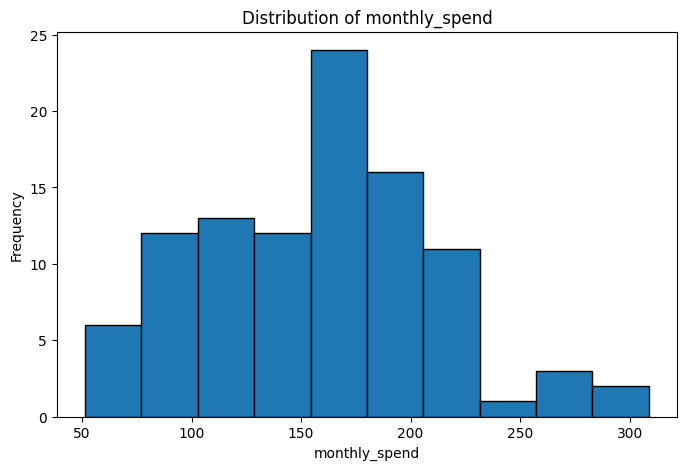

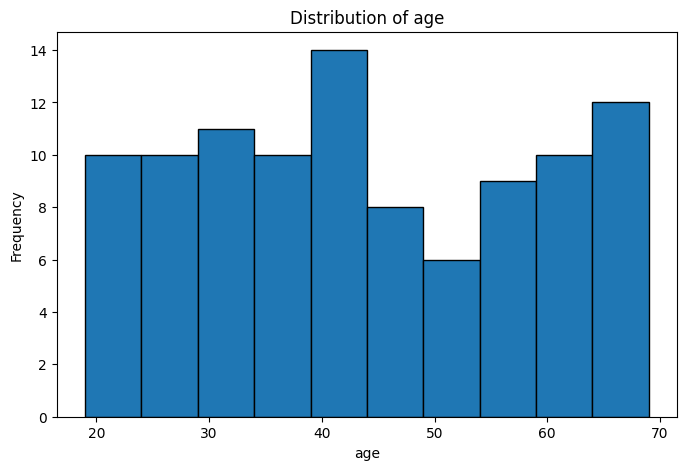

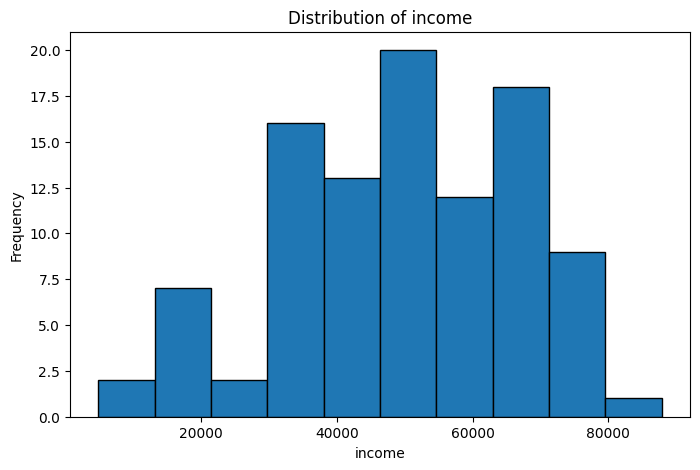

In [ ]:
import matplotlib.pyplot as plt

numerical_vars = ['monthly_spend', 'age', 'income']
for var in numerical_vars:
    plt.figure(figsize=(8, 5))
    plt.hist(df[var].dropna(), bins=10, edgecolor='black')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

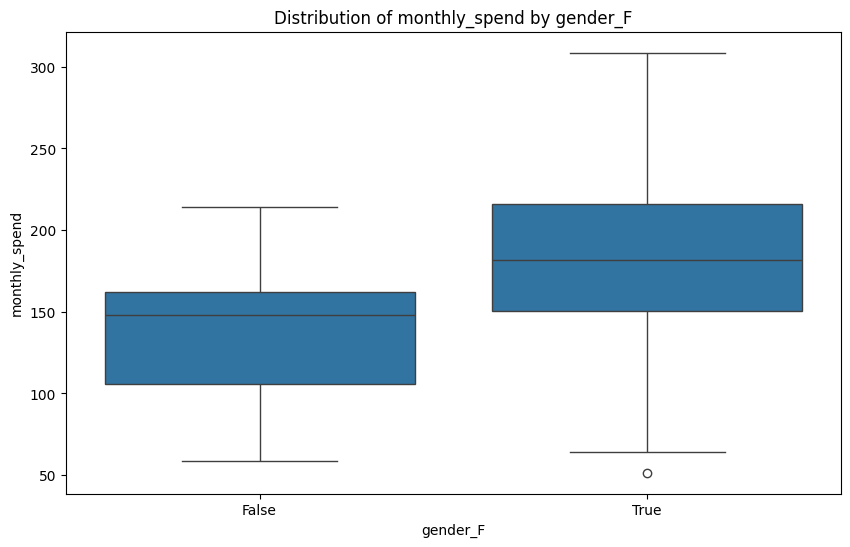

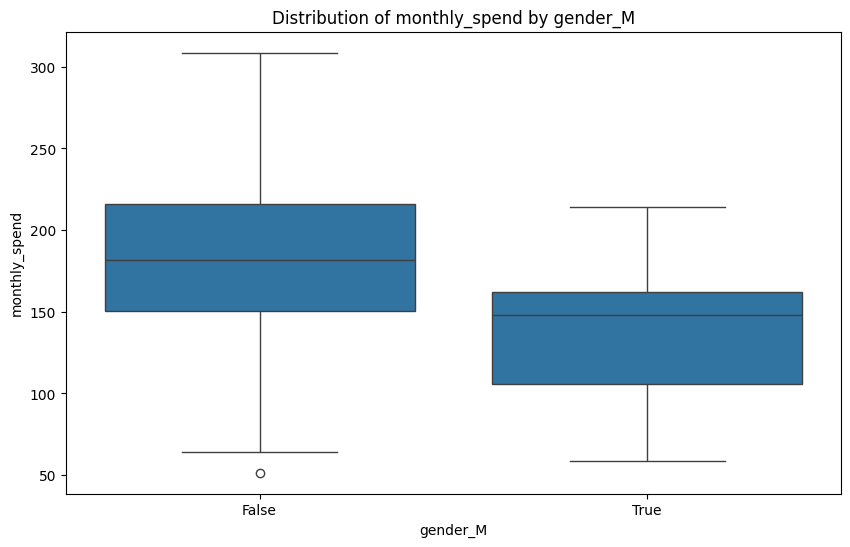

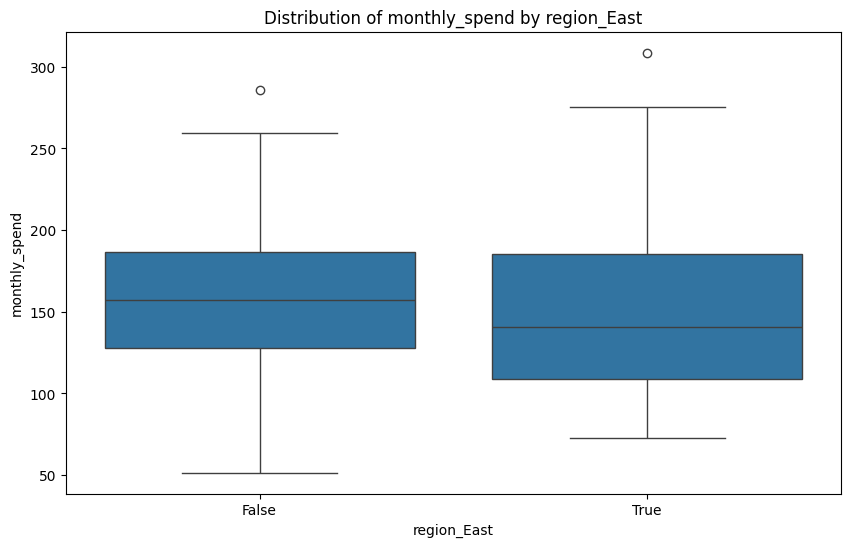

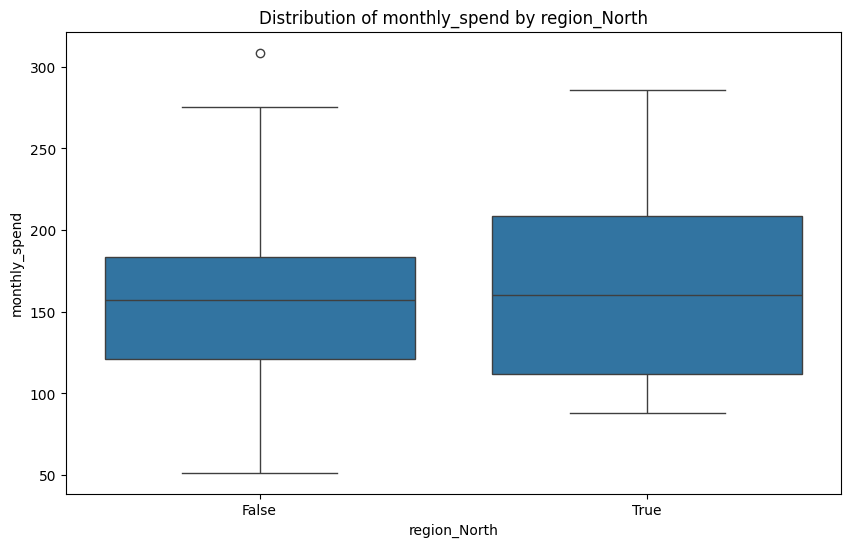

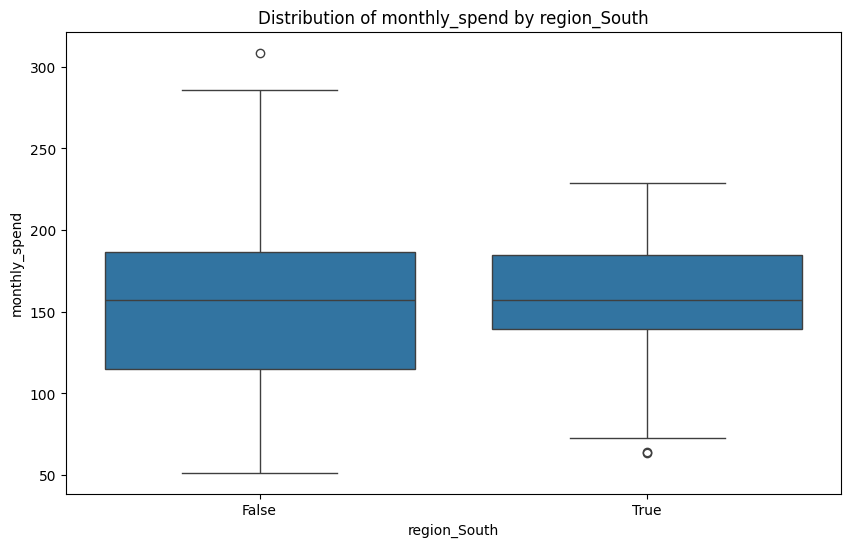

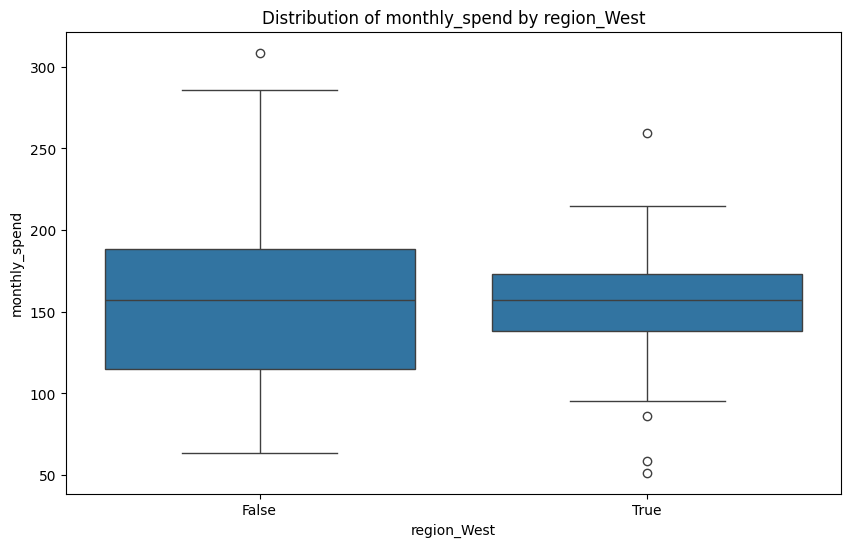

In [ ]:
import seaborn as sns
categorical_vars = ['gender_F', 'gender_M','region_East','region_North', 'region_South', 'region_West']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=var, y='monthly_spend', data=df)
    plt.title(f'Distribution of monthly_spend by {var}')
    plt.xlabel(var)
    plt.ylabel('monthly_spend')
    plt.show()

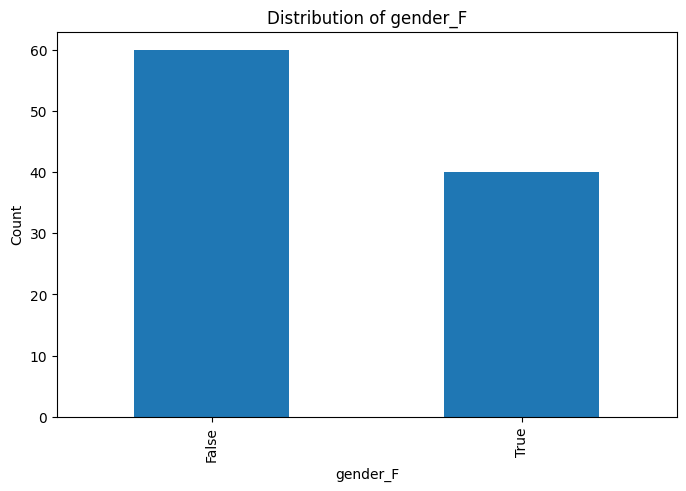

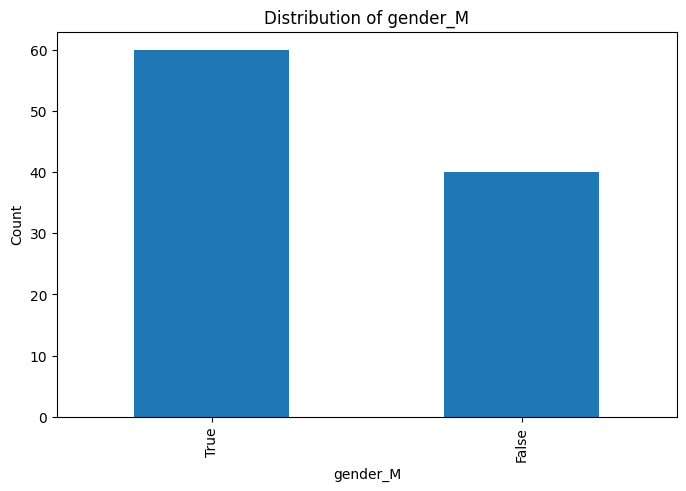

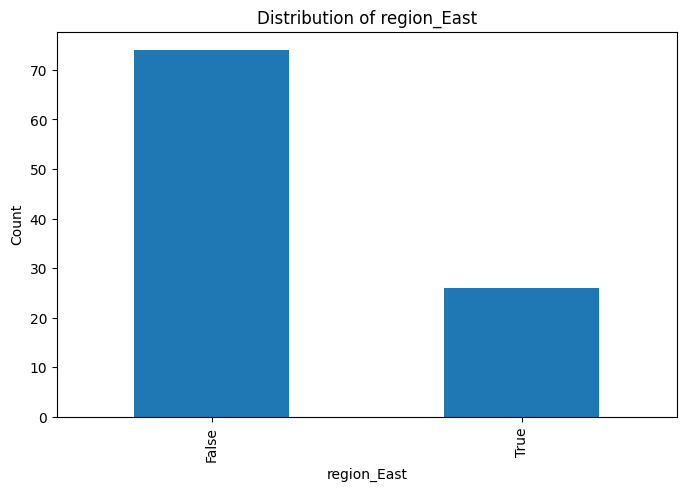

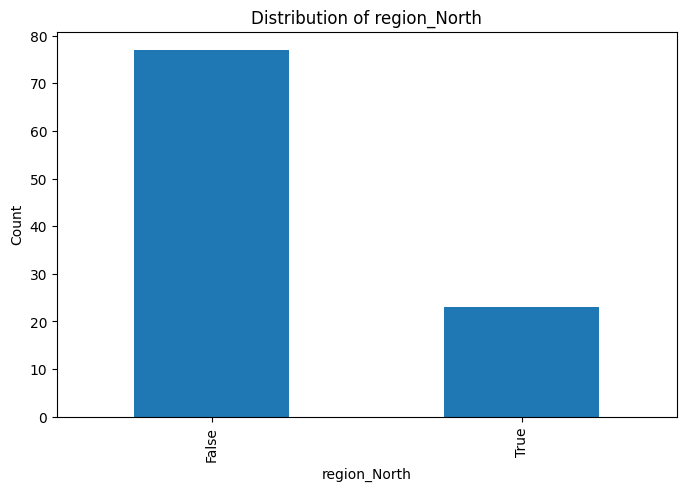

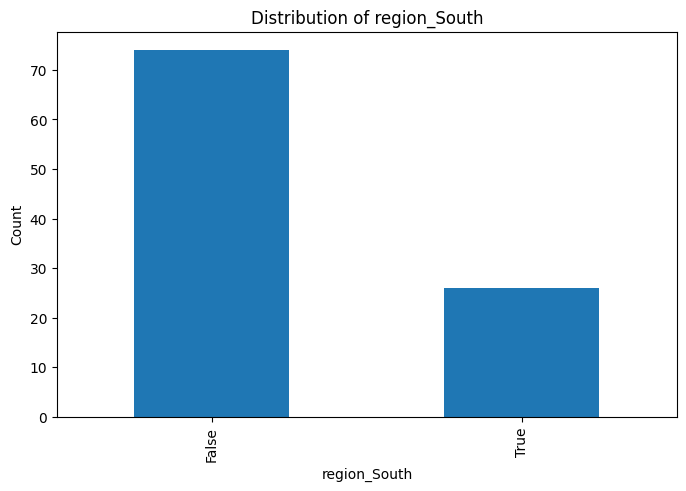

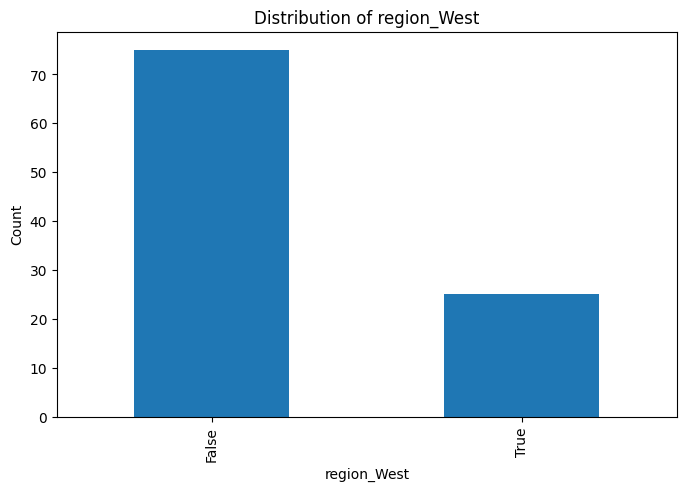

In [ ]:
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    df[var].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

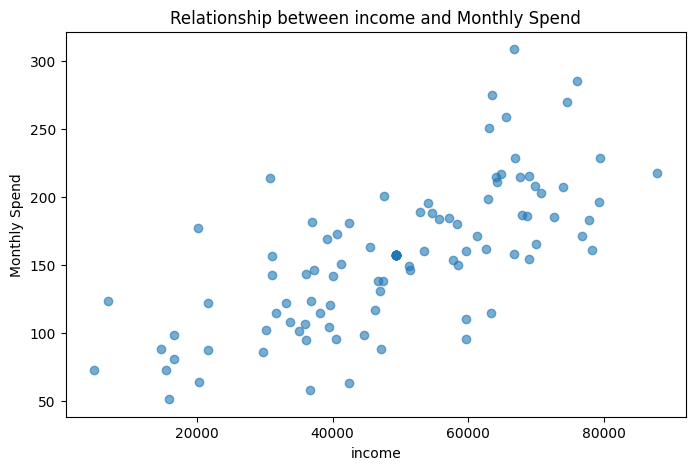

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df['income'], df['monthly_spend'], alpha=0.6)
plt.xlabel('income')
plt.ylabel('Monthly Spend')
plt.title('Relationship between income and Monthly Spend')
plt.show()

In [ ]:
import statsmodels.api as sm
y = df['monthly_spend']
X = df[['gender_M', 'gender_F', 'region_North', 'region_South', 'region_West', 'region_East']]
X = sm.add_constant(X)
X = X.astype(float)
y = y.astype(float)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          monthly_spend   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     5.578
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           0.000446
Time:                        18:07:52   Log-Likelihood:                -526.43
No. Observations:                 100   AIC:                             1063.
Df Residuals:                      95   BIC:                             1076.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           92.1932      2.800     32.924   

Text(0.5, 1.0, 'Correlation Matrix')

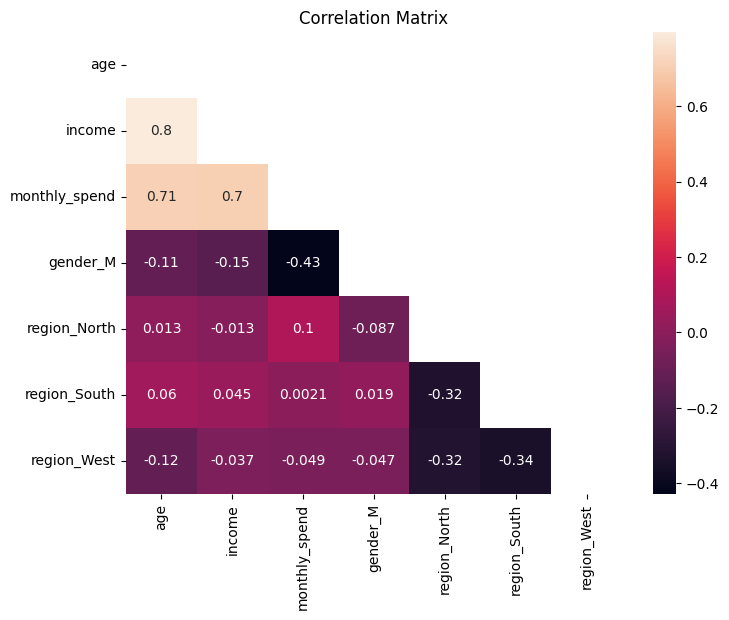

In [ ]:
import seaborn as sns
import numpy as np

correlation_matrix=df[['age', 'income', 'monthly_spend', 'gender_M', 'region_North', 'region_South', 'region_West']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, mask=mask)
plt.title('Correlation Matrix')